In [35]:
#Libraries
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer


In [36]:
positive=BeautifulSoup(open('/home/suyash/Desktop/prai/sorted_data_acl/books/positivereview2').read())
negative=BeautifulSoup(open('/home/suyash/Desktop/prai/sorted_data_acl/books/negative.review').read())
positive=positive.findAll('review_text')
negative=negative.findAll('review_text')

stopwords=open('/home/suyash/stopwords.txt').read()
stopwords=stopwords.split('\n')

In [37]:
wnl=WordNetLemmatizer()

def new_tok(text):
    text=text.lower()
    tok=nltk.tokenize.word_tokenize(text)
    tok=[t for t in tok if len(t)>2]
    tok=[wnl.lemmatize(t) for t in tok]
    tok=[t for t in tok if t not in stopwords]
    return tok

In [38]:
wordnet={}
now=0
positive_tok=[]
negative_tok=[]
for text in positive:
    tokens=new_tok(text.text)
    positive_tok.append(tokens)
    for tok in tokens:
        if tok not in wordnet:
            wordnet[tok]=now
            now+=1
            
for text in negative:
    tokens=new_tok(text.text)
    negative_tok.append(tokens)
    for tok in tokens:
        if tok not in wordnet:
            wordnet[tok]=now
            now+=1

tot=len(positive)+len(negative)

import numpy as np

wdm=np.zeros((tot+1,now+1))
i=0

def wdm_creation(text,label):
    for t in text:
        wdm[i,wordnet[t]]+=1
    wdm[i,:]=wdm[i,:]/sum(wdm[i,:])
    wdm[i,-1]=label

for text in positive_tok:
    wdm_creation(text,1)
    i+=1
    
for text in negative_tok:
    wdm_creation(text,0)
    i+=1

for j in range(5):    
    np.random.shuffle(wdm)

In [69]:
#test="Why do you even write. This is So bad. I wasnt able to read till the end as it was So bad."
test="This book is really good. It is a masterpiece"
test1=new_tok(test)
wdm_creation(test1,0)
i+=1

In [70]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model=model.fit(wdm[:2000,:-1],wdm[:2000,-1])
pred=model.predict([wdm[2000,:-1]])
if pred<0.5:
    print(test,'-Negative Review')
    pred='negative'
else:
    print(test,'-Positive Review')
    pred='positive'

i-=1
wdm[-1,:]=0

('This book is really good. It is a masterpiece', '-Positive Review')


In [24]:
def syuzhet(text,sentiment):
    emotions=pd.read_csv('/home/suyash/Downloads/Entries_in_the_NRC_Emotion_Lexicon_data.csv')
    tokens=new_tok(text)
    df=pd.DataFrame({'joy':0,'anticip':0,'disgust':0,'sadness':0,'positive':0,'negative':0,'anger':0,'surprise':0,'fear':0,'trust':0},index=[0])
    for tok in tokens:
        emotion=emotions[emotions.Word==tok].Positive.unique()
        for emo in emotion:
            df[emo]=df[emo]+1
    if sentiment=='positive':
        df[['joy','anticip','positive','surprise']].plot(kind='bar')
        plt.show()
    if sentiment=='negative':
        df[['sadness','disgust','negative','fear']].plot(kind='bar')
        plt.show()
    return df

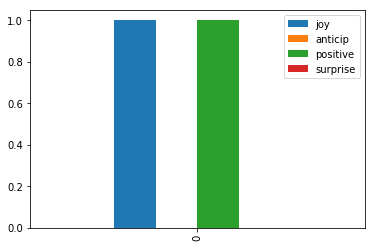

,anger,anticip,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,0,0,0,0,1,0,1,0,0,0


In [71]:
syuzhet(test,pred)